# Task 6 : - Email Spam Filtering

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Load the spam dataset

In [2]:
df = pd.read_csv("spam.csv", encoding='iso-8859-1')


In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


###  Clean and preprocess the dataset

In [7]:
new_column_names = {
    'v1':'Category',
    'v2':'Message',
    'Unnamed: 2': 'X',
    'Unnamed: 3': 'Y',
    'Unnamed: 4': 'Z',
}
df.rename(columns=new_column_names, inplace=True)

In [8]:
df

,Category,Message,X,Y,Z
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
# Drop columns in place
df.drop(['X', 'Y', 'Z'], axis=1, inplace=True)



In [10]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


###  Clean and preprocess the dataset

In [12]:
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})  # Convert labels to binary

In [13]:
df.loc[df['Category'] == 'spam','Category',] = 0
df.loc[df['Category'] == 'ham','Category',] = 1

### Split the data into training and testing sets

In [14]:
X =df['Message']
Y = df['Category']

In [15]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [16]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split( X,Y,test_size=0.3,random_state=101)

In [18]:
X.shape,Y.shape

((5572,), (5572,))

In [19]:
X_train.shape,Y_train.shape

((3900,), (3900,))

In [20]:
X_test.shape,Y_test.shape 

((1672,), (1672,))

### Feature extraction using TF-IDF

In [21]:
feature_extraction =TfidfVectorizer(min_df = 1,stop_words ='english',lowercase=True)

In [22]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int') 


In [23]:
X_train

4028             [Û_] anyway, many good evenings to u! s
1310    I.ll always be there, even if its just in spir...
5469                                              Ok lor.
5375    I cant pick the phone right now. Pls send a me...
3814    Not yet chikku..k, then wat abt tht guy did he...
                              ...                        
4171                               Sorry, I'll call later
599                I'm going out to buy mum's present ar.
1361    Shuhui say change 2 suntec steamboat? U noe wh...
1547    Bishan lar nearer... No need buy so early cos ...
4959            I want  &lt;#&gt;  rs da:)do you have it?
Name: Message, Length: 3900, dtype: object

In [24]:
print(X_train_features)

  (0, 2456)	0.7059549489999895
  (0, 2920)	0.3581475806398441
  (0, 6983)	0.6110302123989032
  (1, 4314)	0.2370956714094205
  (1, 6022)	0.28128489594985284
  (1, 6401)	0.3098875694838365
  (1, 5737)	0.2917052084819533
  (1, 1168)	0.38452205153366104
  (1, 5802)	0.45030244916901674
  (1, 3539)	0.3918852749442818
  (1, 3800)	0.42348393472701124
  (2, 3845)	0.7479654015538056
  (2, 4483)	0.6637377178362357
  (3, 4072)	0.4223306395617799
  (3, 5449)	0.36160630904313473
  (3, 4775)	0.40227877127126643
  (3, 5254)	0.42488920642263106
  (3, 4709)	0.39117605497792846
  (3, 4724)	0.44215376805979023
  (4, 4218)	0.39729081489565904
  (4, 3413)	0.38330205279920093
  (4, 5906)	0.36358599997950203
  (4, 2136)	0.23244828589442207
  (4, 3012)	0.31016513224364606
  (4, 6246)	0.36358599997950203
  :	:
  (3896, 975)	0.5072549630844536
  (3896, 4239)	0.46290378531732357
  (3896, 1465)	0.38697729182787627
  (3896, 2908)	0.31678021802974415
  (3897, 5877)	0.4948070954455213
  (3897, 4377)	0.368032087900077

### Train a logistic regression model

In [25]:
model = LogisticRegression()

In [26]:
model.fit(X_train_features,Y_train)

LogisticRegression()

### Evaluate the model on the training and testing datasets

In [27]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_of_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [28]:
accuracy_of_training_data

0.9651282051282051

In [29]:
prediction_of_test_data = model.predict(X_test_features)
accuracy_of_test_data = accuracy_score(Y_test,prediction_of_test_data)

In [30]:
accuracy_of_test_data

0.9611244019138756

### Classifying / filtering new emails

In [31]:
input_your_mail = ["REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode"]

input_data_features = feature_extraction.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if(prediction[0]==1):
    print("Ham mail")
else:
    print("spam mail")

[0]
spam mail


### Visualization

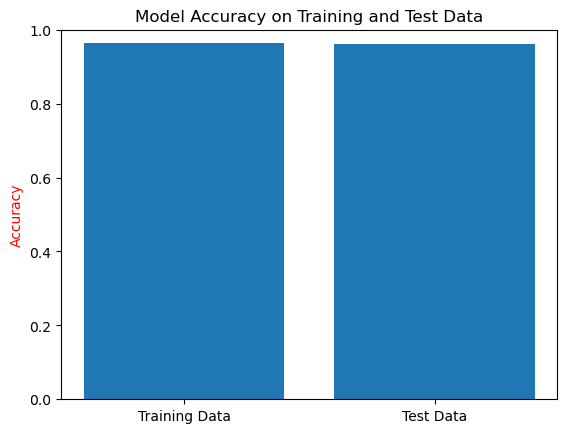

In [32]:
# Create a bar chart to visualize model accuracy
labels = ['Training Data', 'Test Data']
accuracy_values = [accuracy_of_training_data, accuracy_of_test_data]

plt.bar(labels, accuracy_values)
plt.title('Model Accuracy on Training and Test Data')
plt.ylabel('Accuracy',c="r")
plt.ylim(0, 1.0)
plt.show()

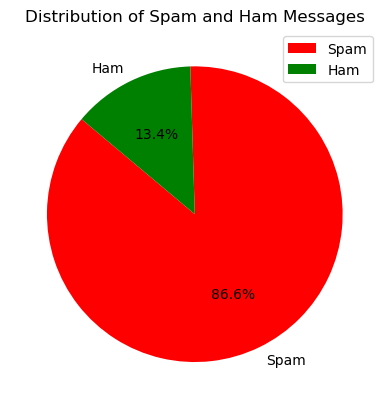

In [33]:
# a pie chart to visualize the distribution of spam and ham messages
category_counts = df['Category'].value_counts()
labels = ['Spam', 'Ham']
colors = ['red', 'green']
plt.pie(category_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam and Ham Messages')
plt.legend()
plt.show()